## Energy for flow past cylinder

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [14]:

def psi_c_general(x , y , func ):
    """
    Converts Cartesian x and y to polar coords, and calls func
    """
    r = np.sqrt(x**2+y**2)
    th= np.arctan2(y,x)  #  np.arctan(y/x)# 
    return func(r,th)


### Potential flow past cylinder

In [2]:
def u_r(r,th):
#    f = np.zeros((len(r),len(th)))
#    f[ r > 1 ] = (r-1/r)*np.sin(th)
    return np.where( r <= 1.0 , 0 , (1-1/r**2)*np.cos(th) )  

def u_t(r,th):
#    f = np.zeros((len(r),len(th)))
#    f[ r > 1 ] = (r-1/r)*np.sin(th)
    return np.where( r <= 1.0 , 0 , -(1+1/r**2)*np.sin(th) )  

def press(r,th):
    return 0.5*(1 - u_r(r,th)**2 - u_t(r,th)**2 ) 

In [53]:
def u_Deltap(r,th):
#    f = np.zeros((len(r),len(th)))
#    f[ r > 1 ] = (r-1/r)*np.sin(th)
    return np.where( r <= 1.0 , 0 ,  ( -4*np.cos(3*th) + 4/r**2 * ( 2  - 1 /r**2 ) * np.cos(th) ) /r**3 )

In [54]:
deltat=0.1
th = np.arange(0, 2*np.pi, deltat )

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_727586/259945404.py:3: SyntaxWarning: invalid escape sequence '\p'
  ax.xaxis.set_major_formatter(FormatStrFormatter( '%g $\pi$' ) )


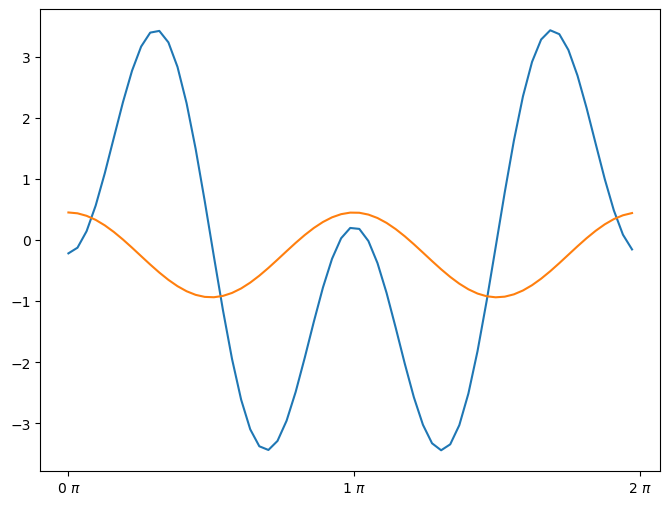

In [55]:
f,ax=plt.subplots(1,figsize=(8,6))
ax.plot( th/np.pi , u_Deltap(1.2, th) , th/np.pi , press(1.2, th) )
ax.xaxis.set_major_formatter(FormatStrFormatter( '%g $\pi$' ) )
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))

In [56]:
deltax=0.025
lim = 2
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
#Zc = psi_c_general ( X  ,  Y , psi )
uDp=  psi_c_general ( X  ,  Y , u_Deltap )
#fi=  psi_c_general ( X  ,  Y , phi )

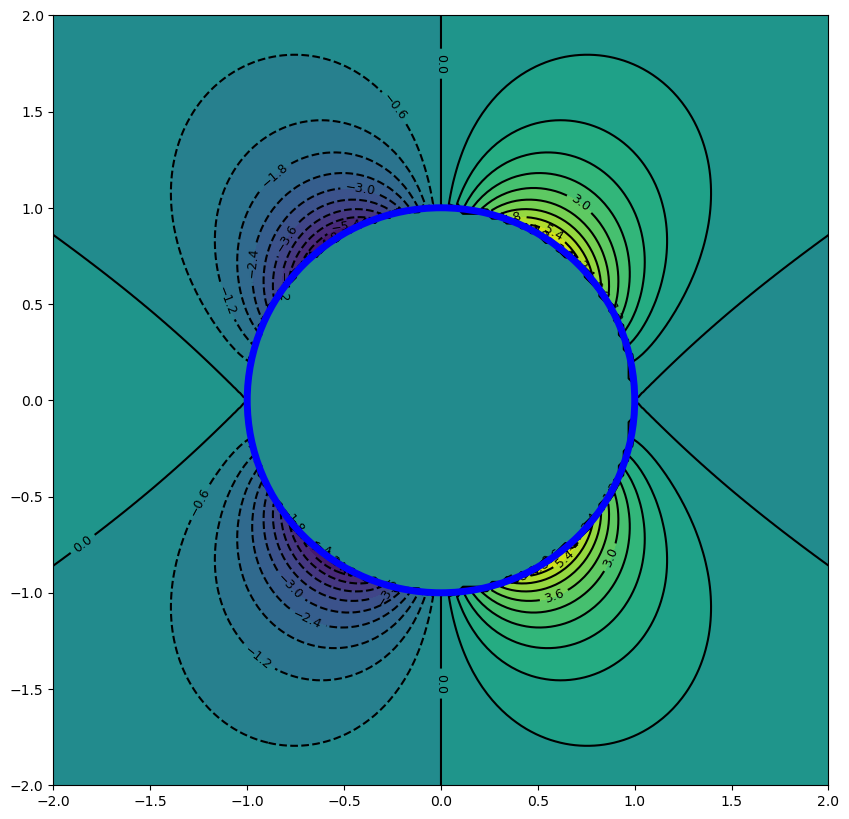

In [63]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5, zorder=10)
height=10
fig, ax2 = plt.subplots(figsize=(1*height, height) )

CS1 = ax2.contour(X, Y, uDp , 20, colors='k',zorder=5 )
#CS1 = ax2.contour(X, Y, fi, colors='k' )
ax2.clabel(CS1, fontsize=9, inline=1)

CS2 = ax2.contourf(X, Y, uDp, 20 ,zorder=2 )

ax2.add_artist(circle)


f.savefig('potential_flow_past_cylinder_p_on_cyl.eps')

In [6]:
deltar=0.1
deltat=0.1
th = np.arange(0,2*np.pi, deltat )
r  = np.arange(1.0, 2.0, deltar)
R, T = np.meshgrid(r, th)

In [7]:
Z = phi(R  ,  T  )

Text(0.5,1.05,'Streamlines, does not really work')

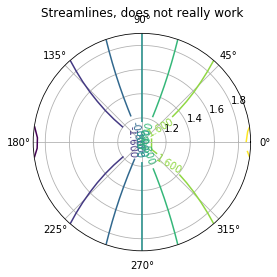

In [19]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
CS = ax.contour(T, R, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Streamlines, does not really work')

In [20]:
X= R*np.cos(T)
Y= R*np.sin(T)

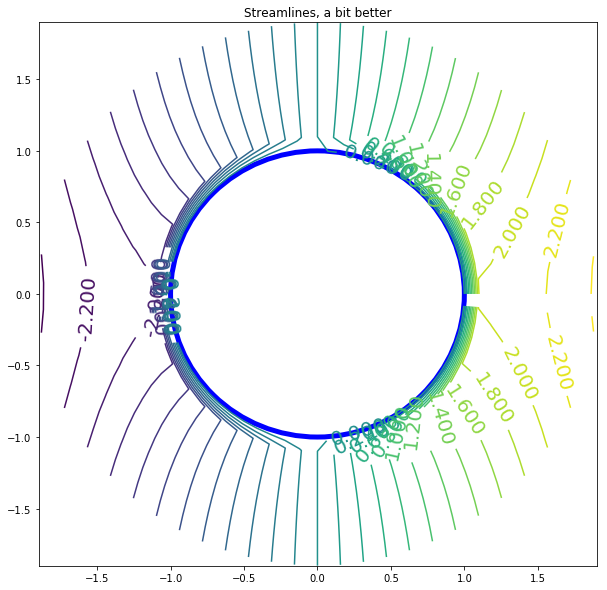

In [22]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contour(X, Y, Z, levels= np.arange(-5, 5, 0.2) )
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines, a bit better')
#ax.set_ylim(0 ,2)
ax.add_artist(circle)

In [30]:
deltax=0.01
lim = 2
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zc = psi_c_general ( X  ,  Y , phi )

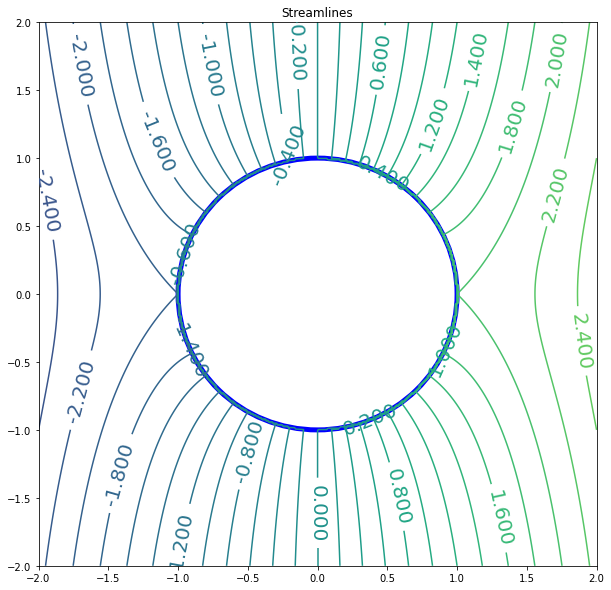

In [31]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax2 = plt.subplots(figsize=(1*height, height) )
CS2 = ax2.contour(X, Y, Zc, levels= np.arange(-5, 5, 0.2) ) 
ax2.clabel(CS2, inline=1, fontsize=20)
ax2.set_title('Streamlines')
#ax2.set_ylim(0 ,lim)
#ax.set_aspect( 1 )
ax2.add_artist(circle)

In [22]:
#fig.savefig('potential_flow_past_cylinder.eps')

In [88]:
fig.savefig('potential_flow_past_cylinder_vel.eps')

In [117]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

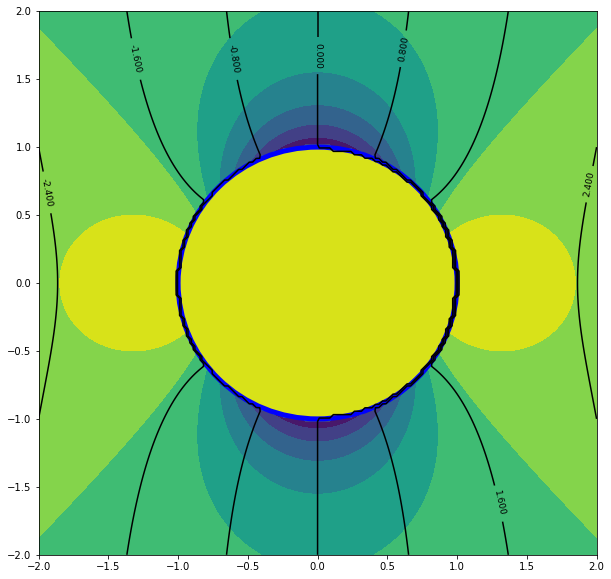

In [118]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax2 = plt.subplots(figsize=(1*height, height) )
CS1 = ax2.contour(X, Y, fi, colors='k' )
ax2.clabel(CS1, fontsize=9, inline=1)
CS2 = ax2.contourf(X, Y, pp )
ax2.add_artist(circle)

In [119]:
fig.savefig('potential_flow_past_cylinder_phi_p.eps')

In [100]:
deltax=0.2
lim = 2
nn = int(2*lim/deltax)
x2 = np.linspace( -lim , lim , nn )
y2 = np.linspace( -lim , lim , nn )
X2, Y2 = np.meshgrid(x2, y2)
ur =  psi_c_general ( X2  ,  Y2 , u_r )
ut =  psi_c_general ( X2  ,  Y2 , u_t )
R2 = np.sqrt(X2**2 + Y2**2 )
ux=  ur*X2/R2 - ut*Y2/R2 
uy=  ur*Y2/R2 + ut*X2/R2

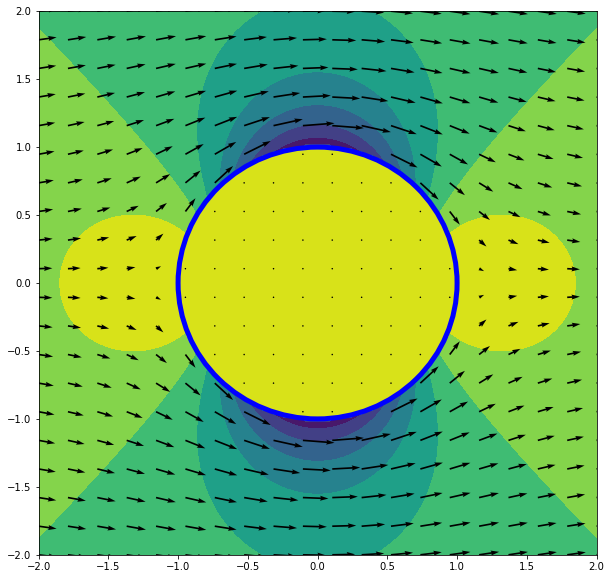

In [101]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax2 = plt.subplots(figsize=(1*height, height) )
CS1 = ax2.contourf(X, Y, pp )
CS2 = ax2.quiver(X2, Y2, ux, uy ) 
#ax2.clabel(CS2, inline=1, fontsize=20)
#ax2.set_title('Streamlines')
#ax2.set_ylim(0 ,lim)
#ax.set_aspect( 1 )
ax2.add_artist(circle)

In [102]:
fig.savefig('potential_flow_past_cylinder_vel_p.eps')

In [111]:
u_t( 1.01 , np.pi/2)

array(-1.98029605)